# Exploratory Data Analysis

In [1]:
import pandas as pd
import altair as alt
from pandas_profiling import ProfileReport

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
train_df = pd.read_csv('data/raw/train.csv')

In [3]:
train_df.shape

(75757, 64)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [5]:
state_factor_cats = len(train_df["State_Factor"].unique())
building_class_cats = len(train_df["building_class"].unique())
facility_type_cats = len(train_df["facility_type"].unique())

print(
    f'The features "State_Factor", "building_class", and "facility_type" have {state_factor_cats}, {building_class_cats}, and {facility_type_cats} categories, respectively.'
)

The features "State_Factor", "building_class", and "facility_type" have 7, 2, and 60 categories, respectively.


In [6]:
numerical_features = train_df.select_dtypes('number').columns.tolist()
numerical_features.remove('id')
categorical_features = train_df.select_dtypes('object').columns.tolist()
drop_features = ['id']

In [7]:
train_sample = train_df.sample(5000, random_state=123)

In [8]:
alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype');

## Numerical Features EDA

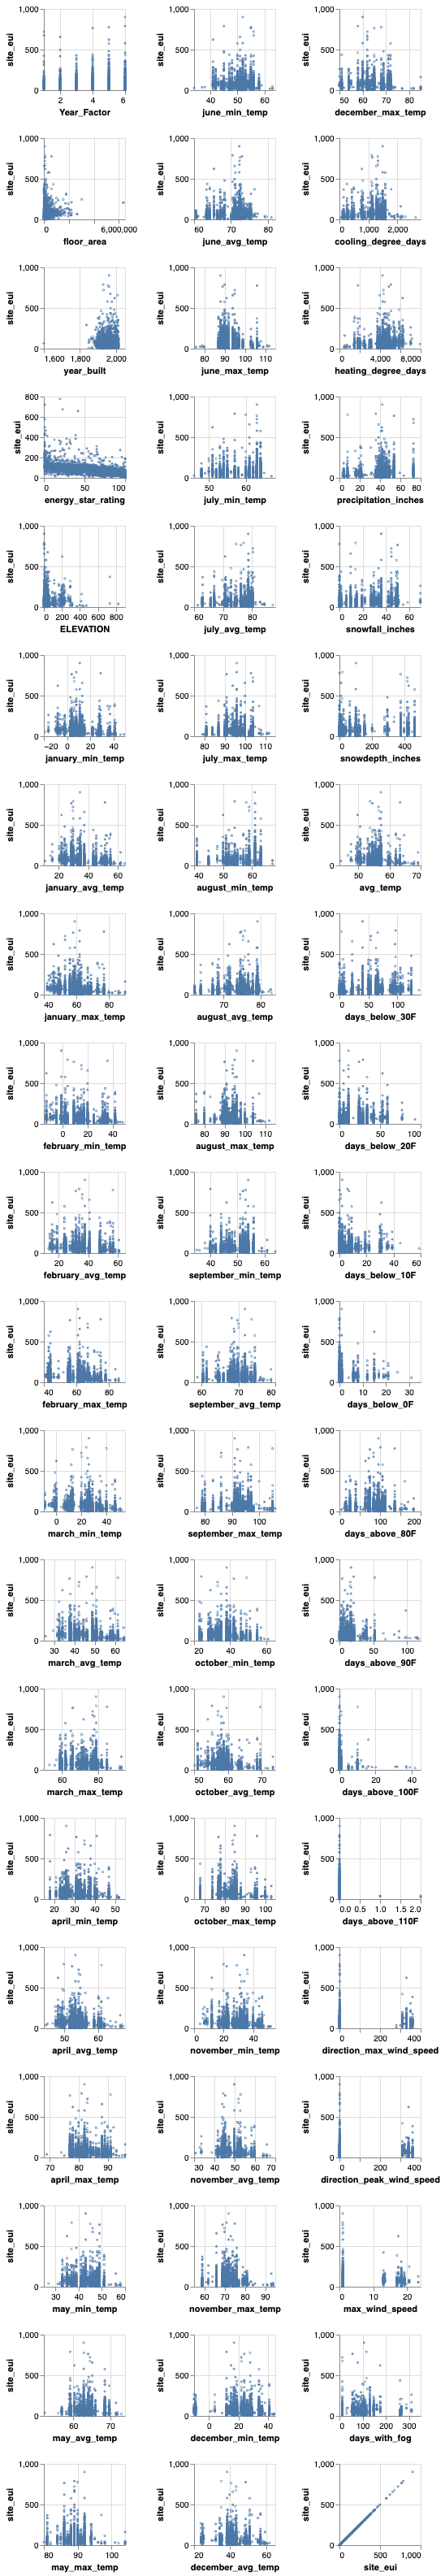

In [9]:
num_eda_1 = (
    alt.Chart(train_sample)
    .mark_point(size=1, opacity=0.8)
    .encode(
        x=alt.X(alt.repeat('row'), type="quantitative", scale=alt.Scale(zero=False)),
        y=alt.Y('site_eui')
    )
    .properties(width=100, height=100)
    .repeat(row=numerical_features[0:20])
    #.configure_axis(labels=True)
)

num_eda_2 = (
    alt.Chart(train_sample)
    .mark_point(size=1, opacity=0.8)
    .encode(
        x=alt.X(alt.repeat('row'), type="quantitative", scale=alt.Scale(zero=False)),
        y=alt.Y('site_eui')
    )
    .properties(width=100, height=100)
    .repeat(row=numerical_features[20:40])
    #.configure_axis(labels=True)
)

num_eda_3 = (
    alt.Chart(train_sample)
    .mark_point(size=1, opacity=0.8)
    .encode(
        x=alt.X(alt.repeat('row'), type="quantitative", scale=alt.Scale(zero=False)),
        y=alt.Y('site_eui')
    )
    .properties(width=100, height=100)
    .repeat(row=numerical_features[40:60])
    #.configure_axis(labels=True)
) 

num_eda = num_eda_1 | num_eda_2 | num_eda_3

num_eda

In [18]:
corr_df = (
    train_df[numerical_features]
    .corr('spearman')
    .abs()
    .stack()
    .reset_index(name='corr')
)
corr_df_target = corr_df[corr_df['level_1']=='site_eui']

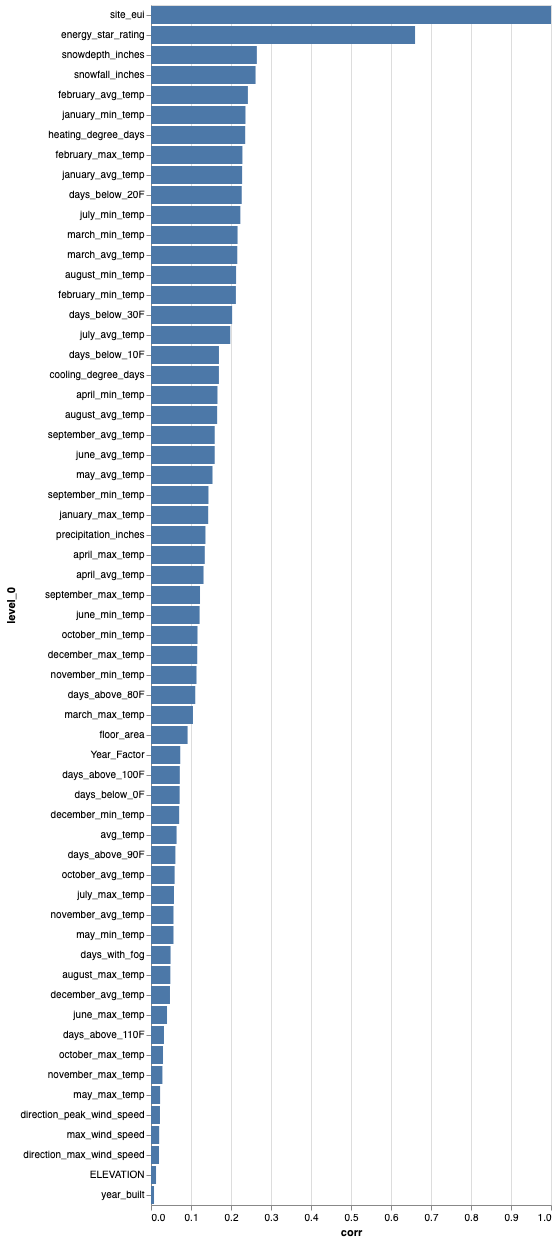

In [19]:
corr_chart = alt.Chart(corr_df_target).mark_bar().encode(
    x=alt.X('corr'),
    y=alt.Y('level_0', sort='-x')
#     size='corr',
#     color='corr'
    #color=alt.Color('corr', scale=alt.Scale(domain=(-1, 1), scheme='purpleorange'))
)

corr_chart

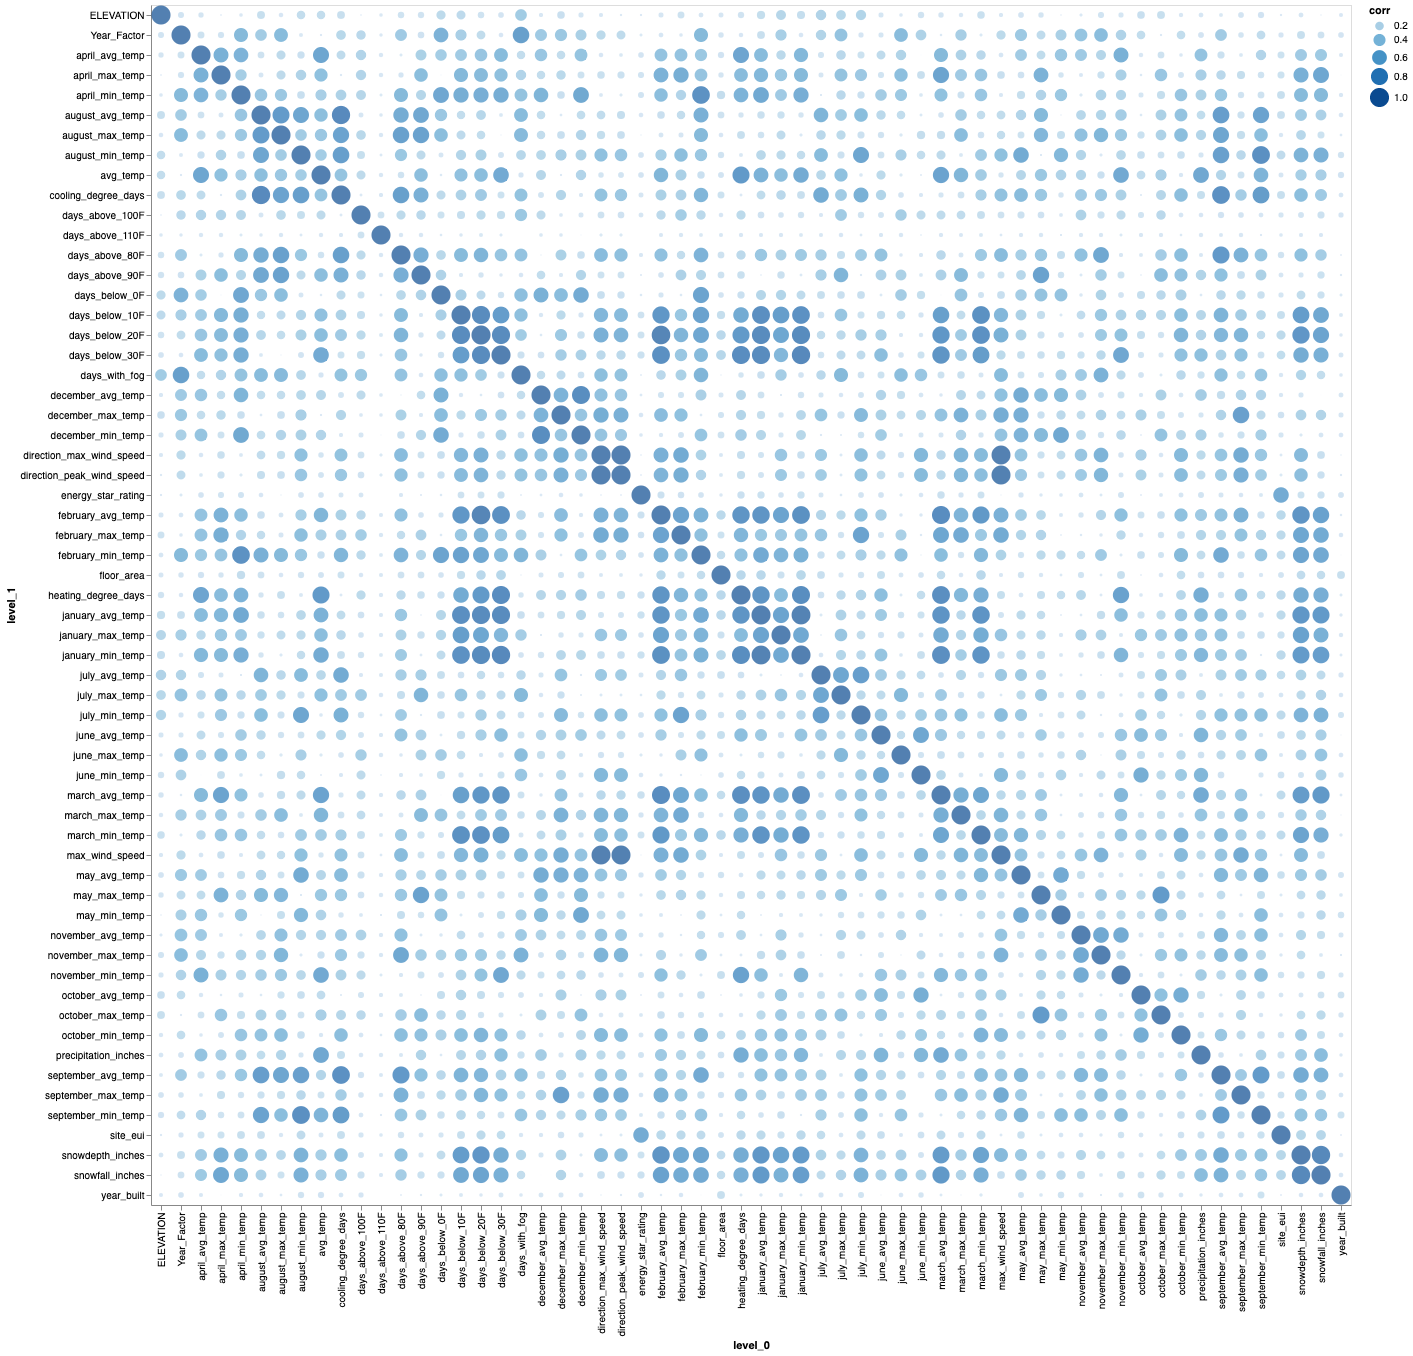

In [25]:
corr_map = alt.Chart(corr_df).mark_circle().encode(
    x=alt.X('level_0'),
    y=alt.Y('level_1'),
    size='corr',
    color='corr'
    # color=alt.Color('corr', scale=alt.Scale(domain=(-1, 1), scheme='purpleorange'))
)

corr_map

## Categorical Features EDA

In [12]:
# cat_eda = (
#     alt.Chart(train_sample)
#     .mark_tick(opacity=0.1)
#     .encode(
#         x=alt.X('site_eui', scale=alt.Scale(zero=False)),
#         y=alt.Y(alt.repeat('row'), type='nominal', sort='x')
#     )
#     #.properties(width=100, height=100)
#     .repeat(row=categorical_features)
#     .configure_axis(labels=True)
# )
# cat_eda

In [13]:
sort_order = {}
for feature in categorical_features:
    sort_order[feature] = (
        train_sample.groupby(feature)['site_eui']
        .mean()
        .sort_values()
        .index
        .tolist()
    )

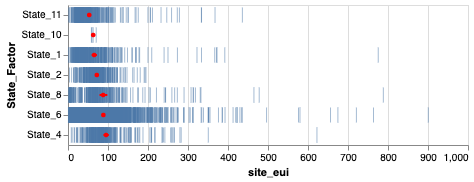

In [14]:
state_factor_ticks = (
    alt.Chart(train_sample)
    .mark_tick(opacity=0.5)
    .encode(
        x=alt.X('site_eui', scale=alt.Scale(zero=False)),
        y=alt.Y('State_Factor', sort=sort_order['State_Factor'])
    )
)

state_factor_ci = state_factor_ticks.mark_errorbar(extent="ci", rule=alt.LineConfig(size=2)).encode(
    color=alt.value('red')
)

state_factor_mean = state_factor_ticks.mark_circle(size=20).encode(
    x='mean(site_eui)', color=alt.value('red')
)

state_factor_eda = state_factor_ticks + state_factor_ci + state_factor_mean

state_factor_eda

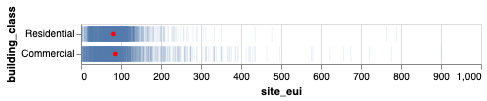

In [15]:
building_class_ticks = (
    alt.Chart(train_sample)
    .mark_tick(opacity=0.1)
    .encode(
        x=alt.X('site_eui', scale=alt.Scale(zero=False)),
        y=alt.Y('building_class', sort=sort_order['building_class'])
    )
)

building_class_ci = building_class_ticks.mark_errorbar(extent="ci", rule=alt.LineConfig(size=2)).encode(
    color=alt.value('red')
)

building_class_mean = building_class_ticks.mark_circle(size=20).encode(
    x='mean(site_eui)', color=alt.value('red')
)

building_class_eda = building_class_ticks + building_class_ci + building_class_mean

building_class_eda

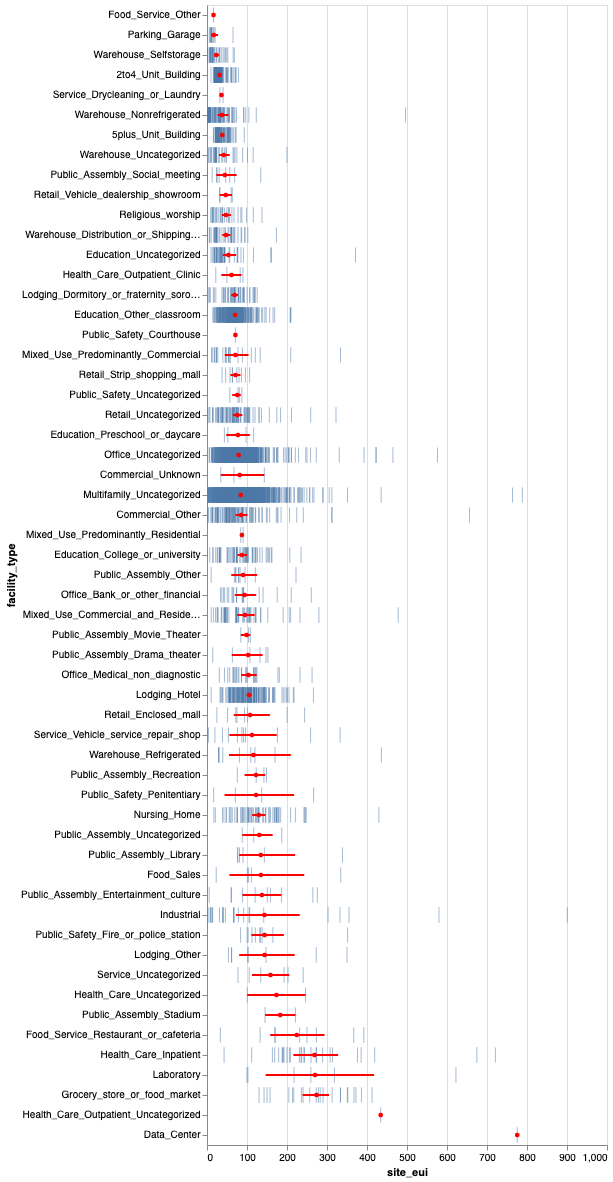

In [16]:
facility_type_ticks = (
    alt.Chart(train_sample)
    .mark_tick(opacity=0.5)
    .encode(
        x=alt.X('site_eui', scale=alt.Scale(zero=False)),
        y=alt.Y('facility_type', sort=sort_order['facility_type'])
    )
)

facility_type_ci = facility_type_ticks.mark_errorbar(extent="ci", rule=alt.LineConfig(size=2)).encode(
    color=alt.value('red')
)

facility_type_mean = facility_type_ticks.mark_circle(size=20).encode(
    x='mean(site_eui)', color=alt.value('red')
)

facility_type_eda = facility_type_ticks + facility_type_ci + facility_type_mean

facility_type_eda # For features with smaller counts the training sample is not that representative of the whole

In [17]:
X_train, y_train = train_df.drop(axis=1, columns='site_eui'), train_df['site_eui']